# LV 2. 

테이블 해시 함수

https://school.programmers.co.kr/learn/courses/30/lessons/147354

**문제 설명**

    완호가 관리하는 어떤 데이터베이스의 한 테이블은 모두 정수 타입인 컬럼들로 이루어져 있습니다. 테이블은 2차원 행렬로 표현할 수 있으며 열은 컬럼을 나타내고, 행은 튜플을 나타냅니다.
    첫 번째 컬럼은 기본키로서 모든 튜플에 대해 그 값이 중복되지 않도록 보장됩니다. 완호는 이 테이블에 대한 해시 함수를 다음과 같이 정의하였습니다.

    해시 함수는 col, row_begin, row_end을 입력으로 받습니다.
    테이블의 튜플을 col번째 컬럼의 값을 기준으로 오름차순 정렬을 하되, 만약 그 값이 동일하면 기본키인 첫 번째 컬럼의 값을 기준으로 내림차순 정렬합니다.
    정렬된 데이터에서 S_i를 i 번째 행의 튜플에 대해 각 컬럼의 값을 i 로 나눈 나머지들의 합으로 정의합니다.
    row_begin ≤ i ≤ row_end 인 모든 S_i를 누적하여 bitwise XOR 한 값을 해시 값으로서 반환합니다.
    테이블의 데이터 data와 해시 함수에 대한 입력 col, row_begin, row_end이 주어졌을 때 테이블의 해시 값을 return 하도록 solution 함수를 완성해주세요.


**제한사항**

    1 ≤ data의 길이 ≤ 2,500
    1 ≤ data의 원소의 길이 ≤ 500
    1 ≤ data[i][j] ≤ 1,000,000
    data[i][j]는 i + 1 번째 튜플의 j + 1 번째 컬럼의 값을 의미합니다.
    1 ≤ col ≤ data의 원소의 길이
    1 ≤ row_begin ≤ row_end ≤ data의 길이


**입출력 예**

![](https://velog.velcdn.com/images/heyggun/post/36d9acc7-c451-478a-8cc9-03976b3281b4/image.png)


**입출력 예 설명**

    정해진 방법에 따라 튜플을 정렬하면 {4, 2, 9}, {2, 2, 6}, {1, 5, 10}, {3, 8, 3} 이 됩니다.
    S_2 = (2 mod 2) + (2 mod 2) + (6 mod 2) = 0 입니다.
    S_3 = (1 mod 3) + (5 mod 3) + (10 mod 3) = 4 입니다.
    따라서 해시 값은 S_2 XOR S_ 3 = 4 입니다.


In [34]:
def solution(data, col, row_begin, row_end):
    answer = 0
    
    data = sorted(data, key=lambda x: [x[col-1], -x[0]])
    for i in range(row_begin, row_end+1):
        tmp = 0
        for j in data[i-1]:
            tmp += (j%i)
        
        answer ^= tmp
    
    return answer

In [38]:
print(solution([[2,2,6],[1,5,10],[4,2,9],[3,8,3]], 2,2,3))

4


In [33]:
data = [[2,2,6],[1,5,10],[4,2,9],[3,8,3]]
col, row_begin, row_end = 2,2,3
answer= 0

data = sorted(data, key=lambda x: [x[col-1], -x[0]])
print(data)

for i in range(row_begin, row_end+1):
    tmp = 0
    for j in data[i-1]:
        print(f" i, j -> {i},{j}")
        tmp += (j%i)
    answer ^= tmp
    
answer



[[4, 2, 9], [2, 2, 6], [1, 5, 10], [3, 8, 3]]
 i, j -> 2,2
 i, j -> 2,2
 i, j -> 2,6
 i, j -> 3,1
 i, j -> 3,5
 i, j -> 3,10


4

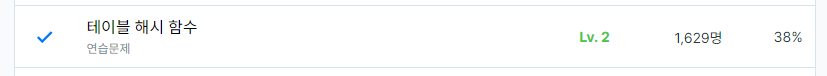

**다른 사람풀이**

위의 코드를 reduce랑 lambda 로 한 줄 풀이함

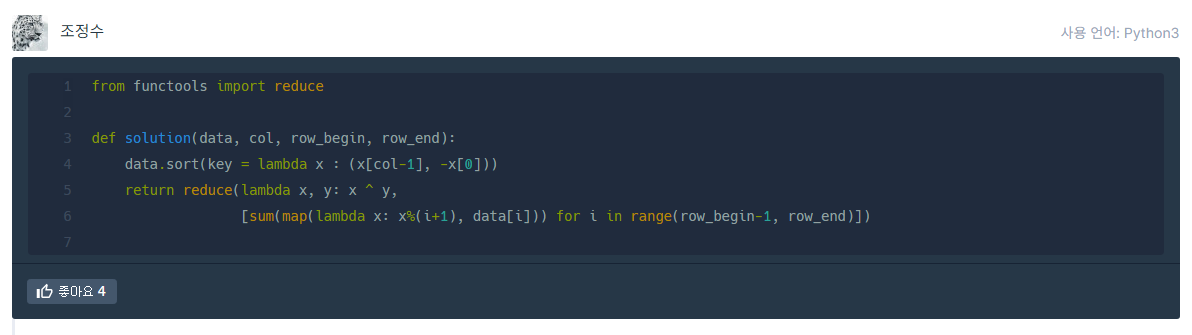